In [38]:
import sys, os
import numpy as np
sys.path.append('../src/')
import torch
from MolGraphNetwork import MolGraphNetwork
from utils import find_repo_root
from scf_guess_tools import Backend
from scf_guess_datasets import Qm9Isomeres

project_root_dir = find_repo_root()
print("Project root directory:", project_root_dir)
BASIS_PATH = "../../../scripts/6-31g_2df_p_custom_nwchem.gbs"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Project root directory: /home/ewachmann/REPOS/Masterarbeit
Using device: cuda


In [39]:
dataset = Qm9Isomeres(
    "/home/dmilacher/datasets/data", 
    size = 500, # number of molecules to load
    split_ratio=0.8, # using 80% training / 10 % val / 10% test split
)

In [40]:
MGNN = MolGraphNetwork(dataset=dataset,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=16,
                       hidden_dim=256,
                       message_passing_steps=3,
                       edge_threshold_val=5,
                       message_net_layers=3,
                       message_net_dropout=0.1,
                       target="density",
                       data_aug_factor=3,
                       verbose_level=2)
MGNN.load_data()

Setting verbose level to: 2
Loading 500 files from qm9_isomeres...
Loading 400 files for train set from /home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz...
Loading 50 files for val set from /home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz...
Loading 50 files for test set from /home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz...


Creating training graphs: 400it [00:10, 38.99it/s]


Augmenting training set using factor 3 -> 800 additional training samples.


Augmenting data: 100%|██████████| 800/800 [09:53<00:00,  1.35it/s]
Creating validation graphs: 50it [00:00, 54.95it/s]
Creating test graphs: 50it [00:02, 21.36it/s]


Total samples: 2100, Train: 400 (with 800 / 400 augmented samples), Val: 50, Test: 50
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.
Normalization factors computed and applied.
Center stats: {'C': (0.08893045239638739, 0.2721039375810203), 'H': (0.3772194703420003, 0.468965563609298), 'O': (0.08820201116919178, 0.2707920626400333)}, Edge stats: {'C_C': (0.000952855165742902, 0.05979429423593619), 'C_H': (0.003315086654901403, 0.0646313326734816), 'C_O': (0.00040458186962299134, 0.04385093688988531), 'H_H': (0.0060247954670800685, 0.03748058495249553), 'H_O': (0.0016399724467497272, 0.03819861938390691), 'O_O': (-4.212609050314401e-05, 0.007277595435046095)}
First train batch: 304 atoms, 5050 edges, 304 center blocks.
Found center block size 351 for atom type C.
Found center block size 351 for atom type O.
Found center block size 15 for atom type H.
Found edge block size 676 fo

In [42]:
RETRAIN = False  
model_name = "MGNN_6-31G_data_aug"
if not RETRAIN and os.path.exists(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth"):
    MGNN.load_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")
else:
    MGNN.train_model(num_epochs=100, lr=1e-3, weight_decay=1e-5, model_save_path=f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")
    MGNN.save_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")

Epoch 1 [Train]: 100%|██████████| 75/75 [02:38<00:00,  2.12s/it]


Epoch 1/100 → Avg Train Loss: 96.138832


Epoch 1 [Val]: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


Epoch 1/100 → Avg Val   Loss: 96.241375
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 2 [Train]: 100%|██████████| 75/75 [02:23<00:00,  1.92s/it]


Epoch 2/100 → Avg Train Loss: 88.004069


Epoch 2 [Val]: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


Epoch 2/100 → Avg Val   Loss: 91.205873
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 3 [Train]: 100%|██████████| 75/75 [02:59<00:00,  2.40s/it]


Epoch 3/100 → Avg Train Loss: 84.684230


Epoch 3 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]


Epoch 3/100 → Avg Val   Loss: 89.055643
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 4 [Train]: 100%|██████████| 75/75 [03:33<00:00,  2.84s/it]


Epoch 4/100 → Avg Train Loss: 81.144385


Epoch 4 [Val]: 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]


Epoch 4/100 → Avg Val   Loss: 87.509460
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 5 [Train]: 100%|██████████| 75/75 [04:30<00:00,  3.61s/it]


Epoch 5/100 → Avg Train Loss: 77.877148


Epoch 5 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]


Epoch 5/100 → Avg Val   Loss: 87.631313


Epoch 6 [Train]: 100%|██████████| 75/75 [01:44<00:00,  1.39s/it]


Epoch 6/100 → Avg Train Loss: 76.133476


Epoch 6 [Val]: 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]


Epoch 6/100 → Avg Val   Loss: 86.921705
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 7 [Train]: 100%|██████████| 75/75 [02:36<00:00,  2.08s/it]


Epoch 7/100 → Avg Train Loss: 75.296983


Epoch 7 [Val]: 100%|██████████| 4/4 [00:09<00:00,  2.48s/it]


Epoch 7/100 → Avg Val   Loss: 86.761818
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 8 [Train]: 100%|██████████| 75/75 [03:32<00:00,  2.84s/it]


Epoch 8/100 → Avg Train Loss: 74.720034


Epoch 8 [Val]: 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


Epoch 8/100 → Avg Val   Loss: 86.688904
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 9 [Train]: 100%|██████████| 75/75 [03:42<00:00,  2.97s/it]


Epoch 9/100 → Avg Train Loss: 74.303789


Epoch 9 [Val]: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Epoch 9/100 → Avg Val   Loss: 86.514088
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 10 [Train]: 100%|██████████| 75/75 [03:20<00:00,  2.67s/it]


Epoch 10/100 → Avg Train Loss: 73.936731


Epoch 10 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


Epoch 10/100 → Avg Val   Loss: 86.384285
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 11 [Train]: 100%|██████████| 75/75 [04:15<00:00,  3.41s/it]


Epoch 11/100 → Avg Train Loss: 73.638229


Epoch 11 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Epoch 11/100 → Avg Val   Loss: 86.608950


Epoch 12 [Train]: 100%|██████████| 75/75 [04:30<00:00,  3.61s/it]


Epoch 12/100 → Avg Train Loss: 73.386117


Epoch 12 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Epoch 12/100 → Avg Val   Loss: 86.163788
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 13 [Train]: 100%|██████████| 75/75 [04:02<00:00,  3.23s/it]


Epoch 13/100 → Avg Train Loss: 73.179039


Epoch 13 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]


Epoch 13/100 → Avg Val   Loss: 86.589634


Epoch 14 [Train]: 100%|██████████| 75/75 [03:36<00:00,  2.89s/it]


Epoch 14/100 → Avg Train Loss: 73.010987


Epoch 14 [Val]: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Epoch 14/100 → Avg Val   Loss: 86.366585


Epoch 15 [Train]: 100%|██████████| 75/75 [03:46<00:00,  3.02s/it]


Epoch 15/100 → Avg Train Loss: 72.846466


Epoch 15 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


Epoch 15/100 → Avg Val   Loss: 86.025621
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 16 [Train]: 100%|██████████| 75/75 [03:11<00:00,  2.56s/it]


Epoch 16/100 → Avg Train Loss: 72.676364


Epoch 16 [Val]: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


Epoch 16/100 → Avg Val   Loss: 86.213037


Epoch 17 [Train]: 100%|██████████| 75/75 [04:08<00:00,  3.31s/it]


Epoch 17/100 → Avg Train Loss: 72.515347


Epoch 17 [Val]: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


Epoch 17/100 → Avg Val   Loss: 85.987230
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 18 [Train]: 100%|██████████| 75/75 [03:54<00:00,  3.13s/it]


Epoch 18/100 → Avg Train Loss: 72.329807


Epoch 18 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


Epoch 18/100 → Avg Val   Loss: 85.968033
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 19 [Train]: 100%|██████████| 75/75 [04:07<00:00,  3.29s/it]


Epoch 19/100 → Avg Train Loss: 72.202439


Epoch 19 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


Epoch 19/100 → Avg Val   Loss: 85.973228


Epoch 20 [Train]: 100%|██████████| 75/75 [03:54<00:00,  3.12s/it]


Epoch 20/100 → Avg Train Loss: 72.057810


Epoch 20 [Val]: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


Epoch 20/100 → Avg Val   Loss: 85.940098
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 21 [Train]: 100%|██████████| 75/75 [03:34<00:00,  2.85s/it]


Epoch 21/100 → Avg Train Loss: 71.929718


Epoch 21 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


Epoch 21/100 → Avg Val   Loss: 85.835913
Model checkpoint saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


Epoch 22 [Train]: 100%|██████████| 75/75 [03:48<00:00,  3.05s/it]


Epoch 22/100 → Avg Train Loss: 71.803391


Epoch 22 [Val]: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


Epoch 22/100 → Avg Val   Loss: 85.923199


Epoch 23 [Train]: 100%|██████████| 75/75 [04:53<00:00,  3.91s/it]


Epoch 23/100 → Avg Train Loss: 71.681636


Epoch 23 [Val]: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]


Epoch 23/100 → Avg Val   Loss: 85.904390


Epoch 24 [Train]: 100%|██████████| 75/75 [03:36<00:00,  2.88s/it]


Epoch 24/100 → Avg Train Loss: 71.545108


Epoch 24 [Val]: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Epoch 24/100 → Avg Val   Loss: 85.838011
No improvement for 3 -> early stopping


Epoch 24 [Test]: 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]


Test  Loss: 85.760006
Model saved to /home/ewachmann/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_data_aug.pth


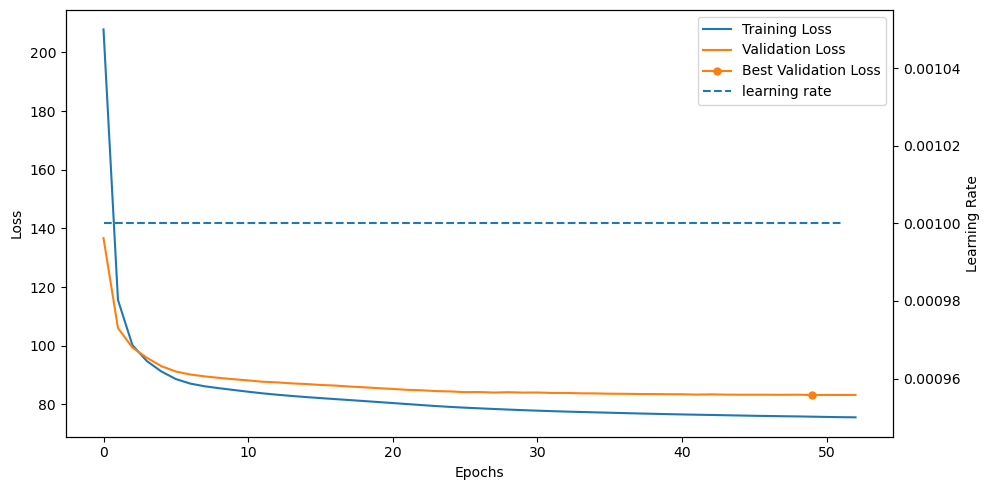

In [ ]:
import pickle
from matplotlib import pyplot as plt
with open(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.history", "rb") as f: 
    hist = pickle.load(f)
# hist["train_loss"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist["train_loss"], label="Training Loss", color="tab:blue")
ax.plot(hist["val_loss"], label="Validation Loss", color="tab:orange")
ax.plot(np.array(hist["val_loss"]).argmin(), hist["val_loss"][np.array(hist["val_loss"]).argmin()],
         marker="o", markersize=5, color="tab:orange", label="Best Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax2 = ax.twinx()
ax2.plot(hist["lr"], linestyle="--", label="learning rate")
ax2.set_ylabel("Learning Rate")
ax2.tick_params(axis='y')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
test_graphs = MGNN.get_graphs("test")

In [ ]:
# aux code for testing
sys.path.append('../../')
from utils import plot_mat_comp

randsample_id = np.random.randint(0, len(test_graphs))
print(f"Testing on random sample with id {randsample_id}")
test_graph = test_graphs[randsample_id]

Testing on random sample with id 24


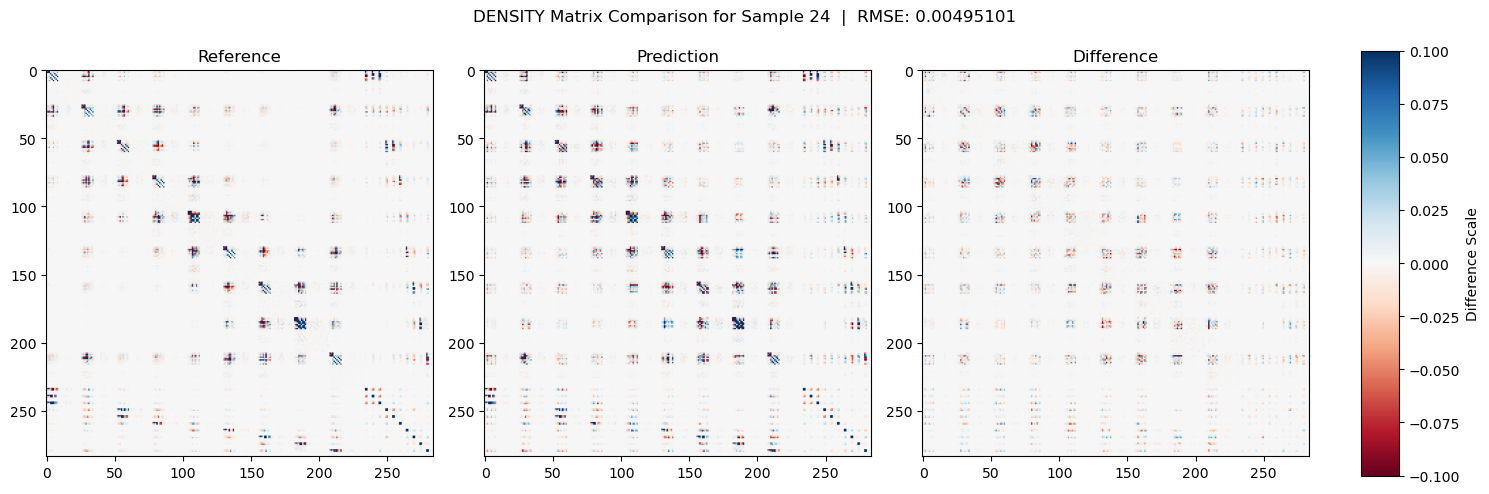

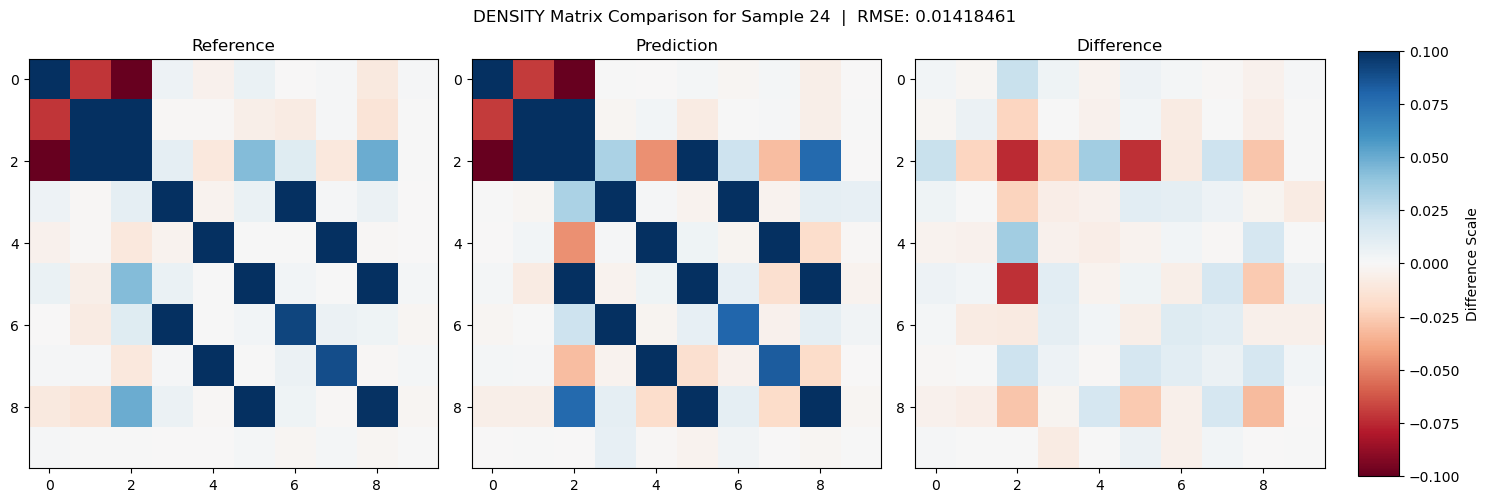

In [ ]:
density_pred, density_truth = MGNN.predict([test_graph], include_target=True, transform_to_density=True)[0]
plot_mat_comp(density_pred, density_truth, 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)
plot_mat_comp(density_pred[:10,:10], density_truth[:10,:10], 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)

ok this already look pretty good for very few training runs!

In [ ]:
from scf_guess_tools import load, calculate, guess
from scipy.linalg import eigh
from pyscf import gto, scf

In [ ]:
# default calc using minao guess!
rand_file = MGNN.get_files("test")[randsample_id]
print(rand_file)
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_minao = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")

/home/ewachmann/REPOS/Masterarbeit/scf_guess_datasets/scf_guess_datasets/qm9_isomeres/xyz/dsC7O2H10nsd_3277.xyz
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.132904646219


In [ ]:
density_pred = density_pred.astype(np.float64)

In [ ]:
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_own = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=density_pred)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.132904646365


In [ ]:
# ground truth guess
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_gt = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=density_truth)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.132904646386


In [ ]:
cycles_minao, cycles_own, cycles_gt = wf_minao.native.cycles, wf_own.native.cycles, wf_gt.native.cycles
print(f"Cycles with minao guess: {cycles_minao}, cycles with own guess: {cycles_own}, cycles with ground truth guess: {cycles_gt}")

Cycles with minao guess: 10, cycles with own guess: 11, cycles with ground truth guess: 5


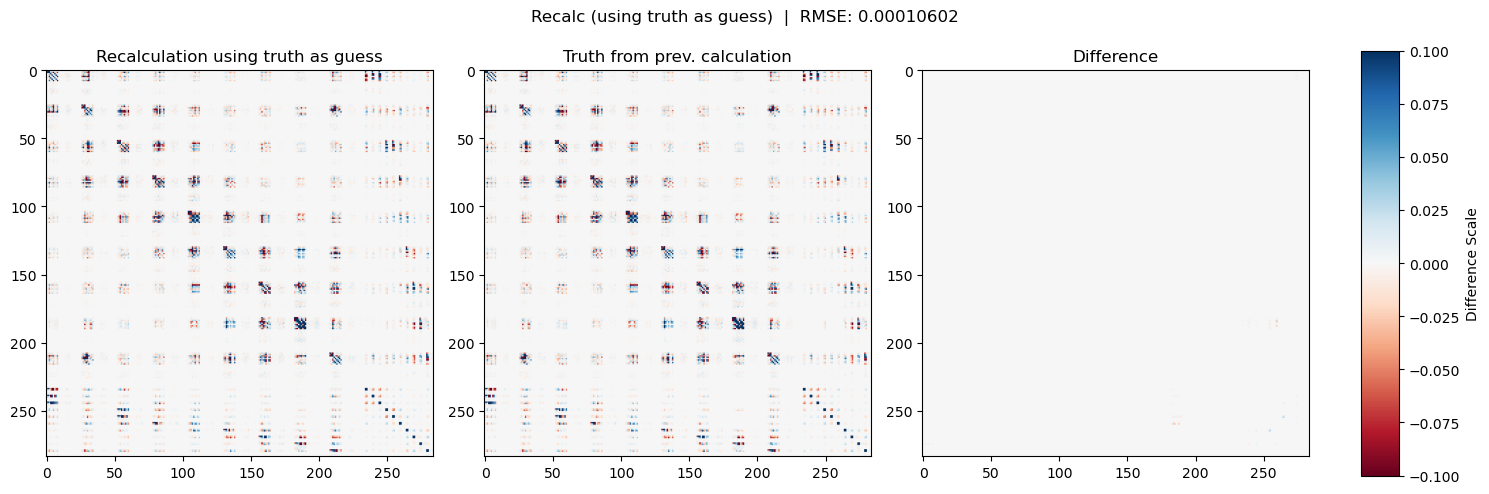

In [ ]:
plot_mat_comp(wf_minao._D, density_truth, title="Recalc (using truth as guess)", ref_title="Recalculation using truth as guess", pred_title="Truth from prev. calculation", vmax=0.1)

# Iteration Benchmark

In [ ]:
%pip install uncertainties

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from time import time
from uncertainties import ufloat
import scf_guess_datasets

In [ ]:
start_time = time()
density_preds = MGNN.predict(test_graphs, include_target=False, transform_to_density=True)
pred_time = time() - start_time # stat benchmarking later
print(f"Prediction time for {len(test_graphs)} samples: {pred_time:.2f} seconds - {pred_time/len(test_graphs):.4f} seconds per sample")

files = MGNN.get_files("test")
print(f"Number of test files: {len(files)}")

cycles =  []
print("Testing for iteration count")

Prediction time for 50 samples: 3.58 seconds - 0.0715 seconds per sample
Number of test files: 50
Testing for iteration count


In [ ]:
# own 
test_keys = dataset.val_keys[len(dataset.val_keys)//2:]  # only use half of the validation set -> which is the test set used by the model!
for i, density_pred in enumerate(density_preds):
    solver = dataset.solver(test_keys[i])
    overlap, hcore, density, fock, status = scf_guess_datasets.solve(solver, density_pred.astype(np.float64))
    cycles.append(status.iterations)
    print(f"Sample {i}: Cycles with own guess: {status.iterations}")


Sample 0: Cycles with own guess: 11
Sample 1: Cycles with own guess: 11
Sample 2: Cycles with own guess: 11
Sample 3: Cycles with own guess: 11
Sample 4: Cycles with own guess: 11
Sample 5: Cycles with own guess: 11
Sample 6: Cycles with own guess: 11
Sample 7: Cycles with own guess: 11
Sample 8: Cycles with own guess: 11
Sample 9: Cycles with own guess: 11
Sample 10: Cycles with own guess: 11
Sample 11: Cycles with own guess: 11
Sample 12: Cycles with own guess: 11
Sample 13: Cycles with own guess: 10
Sample 14: Cycles with own guess: 11
Sample 15: Cycles with own guess: 10
Sample 16: Cycles with own guess: 11
Sample 17: Cycles with own guess: 11
Sample 18: Cycles with own guess: 11
Sample 19: Cycles with own guess: 10
Sample 20: Cycles with own guess: 11
Sample 21: Cycles with own guess: 11
Sample 22: Cycles with own guess: 11
Sample 23: Cycles with own guess: 11
Sample 24: Cycles with own guess: 11
Sample 25: Cycles with own guess: 11
Sample 26: Cycles with own guess: 11
Sample 27: 

In [ ]:
mean_own = np.mean(cycles)
std_own = np.std(cycles)
iter_own = ufloat(mean_own, std_own)
print(f"Average iterations with own guess: {iter_own:.2f}")
with open(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}_cycles.pkl", "wb") as f:
    pickle.dump(cycles, f)

Average iterations with own guess: 10.96+/-0.44


In [44]:
with open(f"{project_root_dir}/3_studies/Block_guessing/models/MGNN_6-31G_no_data_aug_cycles.pkl", "rb") as f:
    cycles_minao = pickle.load(f)
mean_minao = np.mean(cycles_minao)
std_minao = np.std(cycles_minao)
iter_minao = ufloat(mean_minao, std_minao)
print(f"Average iterations with minao guess: {iter_minao:.2f} no data augmentation")

Average iterations with minao guess: 10.96+/-0.44 no data augmentation
